In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

df = pd.read_csv('Employee_Attrition.csv', na_values = missing_value_formats)


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,3.171444,Male,NaN,3.372679,1.993840,Laboratory Technician,4.169226,Married,2806.950012,13077.116879,4.081321,Y,No,17.915157,2.968558,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,4.284094,Male,39.842324,2.038727,2.532482,Healthcare Representative,NaN,Married,NaN,21026.154051,NaN,Y,No,14.692325,2.800889,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,2.152282,Male,91.603642,4.394863,1.964613,Manufacturing Director,2.152039,Married,6609.842365,NaN,1.017623,Y,Yes,18.744411,NaN,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,4.095580,Male,59.110216,2.019760,1.925025,Sales Executive,NaN,Married,5585.302599,11837.891371,1.591695,NaN,No,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN
1469,38.133892,No,Travel_Rarely,703.677110,Research & Development,7.231661,3.292684,Medical,1.061133,NaN,1.738502,Male,67.262829,4.478969,2.291543,Laboratory Technician,2.875309,Married,5188.877974,10276.024987,2.364262,Y,No,10.343964,3.053256,1.076817,82.610288,0.000000,6.493763,3.451604,4.376818,3.755110,3.308961,1.070952,2.025939


In [7]:
df.shape

(1470, 35)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Descriptive Statistics

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,2.715272,6544.718401,14364.334764,2.654394,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,1.146786,4766.580903,7269.420895,2.508952,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,0.724192,891.481007,1567.502382,0.000000,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,1.846039,2961.844066,8138.576694,0.948843,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,2.895032,4957.070475,14258.293365,1.708812,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,3.676663,8268.002496,20322.279885,3.959710,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,5.251277,22858.020388,32751.715800,10.855733,29.797261,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [10]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,1323.000000,1323,1323.000000,1323.000000,1323.000000,1323,1323.000000,1323,1323.000000,1323.000000,1323.000000,1323,1323,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,NaN,783,NaN,NaN,NaN,281,NaN,596,NaN,NaN,NaN,1323,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,2.726443,NaN,65.647722,2.743028,2.058270,NaN,2.715272,NaN,6544.718401,14364.334764,2.654394,NaN,NaN,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,1.129679,NaN,21.469709,0.765568,1.127018,NaN,1.146786,NaN,4766.580903,7269.420895,2.508952,NaN,NaN,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,0.759655,NaN,23.855272,0.722008,0.715172,NaN,0.724192,NaN,891.481007,1567.502382,0.000000,NaN,NaN,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,1.894818,NaN,47.701897,2.177638,1.045228,NaN,1.846039,NaN,2961.844066,8138.576694,0.948843,NaN,NaN,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,2.887313,NaN,64.934490,2.859143,1.936150,NaN,2.895032,NaN,4957.070475,14258.293365,1.708812,NaN,NaN,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,3.676600,NaN,83.038355,3.179128,2.609707,NaN,3.676663,NaN,8268.002496,20322.279885,3.959710,NaN,NaN,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [11]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1323.0,36.635268,9.882161,14.544608,29.624982,34.951950,42.748741,69.402515
DailyRate,1323.0,802.030050,414.031025,86.828045,456.479553,782.958705,1130.577949,1784.394456
DistanceFromHome,1323.0,9.091097,8.177870,0.750112,2.147069,6.920808,13.584900,33.684424
Education,1323.0,2.923447,1.072203,0.770362,2.122706,3.015658,3.700560,6.285161
EmployeeCount,1323.0,0.999325,0.099656,0.628985,0.931146,0.998949,1.067371,1.290613
EmployeeNumber,1323.0,1026.679166,610.480802,1.054148,501.854842,1022.025017,1533.811096,2530.919375
EnvironmentSatisfaction,1323.0,2.726443,1.129679,0.759655,1.894818,2.887313,3.676600,5.254672
HourlyRate,1323.0,65.647722,21.469709,23.855272,47.701897,64.934490,83.038355,123.200439
JobInvolvement,1323.0,2.743028,0.765568,0.722008,2.177638,2.859143,3.179128,5.241968
JobLevel,1323.0,2.058270,1.127018,0.715172,1.045228,1.936150,2.609707,5.942269


## Data Preparation

for the purposes of this analysis i will use 'attrition' as the target variable, first have to convert the variables to integers

In [12]:
df['Attrition'].value_counts()

No     1065
Yes     258
Name: Attrition, dtype: int64

In [13]:
df['Attrition'].unique()

array(['Yes', 'No', nan], dtype=object)

to handle the missing data in the target variable i am going to just drop the missing values in the column, as imputation might introduce a bias to the machine learning models

In [14]:
df.dropna(subset=['Attrition'], inplace=True)

In [15]:
df. shape

(1323, 35)

In [16]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

changing the attrition values to binary 

In [17]:
df['Attrition'] = np.where(df['Attrition']=='Yes', 1,0)

In [18]:
df['Attrition'].value_counts()

0    1065
1     258
Name: Attrition, dtype: int64

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


remove some columns which have the same information, for example, daily rate, hourly rate monthly rate etc.

In [20]:
df['JobInvolvement'].unique()

array([3.42696027, 1.81345843, 1.87722648, ..., 4.39486338, 2.01975986,
       4.47896886])

In [21]:
to_remove = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'WorkLifeBalance', 'Education']
df.drop(columns = to_remove, inplace=True)
df.shape

(1323, 22)

i also removed some of the columns which had values coded as integers foe example JobInvolvement, PerfomanceRating etc because with no proper data dictionary its difficult to tell what those figures represent

### renaming of colmns


In [22]:
new_columns = {'BusinessTravel': 'travel', 'Department': 'dpt',
       'DistanceFromHome': 'distance', 'EducationField':'field', 
       'EmployeeNumber': 'ID', 'EnvironmentSatisfaction': 'environment', 'HourlyRate': 'rate',
       'JobInvolvement': 'involement', 'JobLevel': 'level', 'JobRole': 'role', 'JobSatisfaction': 'job',
       'MaritalStatus': 'marriage', 'NumCompaniesWorked': 'companies',
       'PercentSalaryHike': 'hike', 'PerformanceRating': 'rating',
       'RelationshipSatisfaction': 'rlation', 'StandardHours': 'hours', 'StockOptionLevel': 'stocks',
       'TotalWorkingYears': 'yrsworked', 'TrainingTimesLastYear': 'training', 'WorkLifeBalance': 'wlb',
       'YearsAtCompany': 'yrs', 'YearsInCurrentRole': 'yrsrole', 'YearsSinceLastPromotion': 'yrspromo',
       'YearsWithCurrManager': 'yrsmanager', 'EmployeeCount': 'count'}

df.rename(columns = new_columns, inplace=True)

In [23]:
df.columns

Index(['Age', 'Attrition', 'travel', 'dpt', 'distance', 'field', 'count',
       'Gender', 'rate', 'role', 'marriage', 'companies', 'Over18', 'OverTime',
       'hike', 'stocks', 'yrsworked', 'training', 'yrs', 'yrsrole', 'yrspromo',
       'yrsmanager'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1188 non-null   float64
 1   Attrition   1323 non-null   int32  
 2   travel      1188 non-null   object 
 3   dpt         1187 non-null   object 
 4   distance    1191 non-null   float64
 5   field       1190 non-null   object 
 6   count       1198 non-null   float64
 7   Gender      1191 non-null   object 
 8   rate        1187 non-null   float64
 9   role        1189 non-null   object 
 10  marriage    1194 non-null   object 
 11  companies   1190 non-null   float64
 12  Over18      1189 non-null   object 
 13  OverTime    1192 non-null   object 
 14  hike        1189 non-null   float64
 15  stocks      1193 non-null   float64
 16  yrsworked   1190 non-null   float64
 17  training    1184 non-null   float64
 18  yrs         1190 non-null   float64
 19  yrsrole     1198 non-null  

In [25]:
unique_counts = df.nunique()

print(unique_counts)


Age           1188
Attrition        2
travel           3
dpt              3
distance      1191
field            6
count         1198
Gender           2
rate          1187
role             9
marriage         3
companies     1025
Over18           1
OverTime         2
hike          1189
stocks         703
yrsworked     1183
training      1141
yrs           1153
yrsrole       1004
yrspromo       721
yrsmanager     975
dtype: int64


dealing with duplicate rows

In [26]:
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, travel, dpt, distance, field, count, Gender, rate, role, marriage, companies, Over18, OverTime, hike, stocks, yrsworked, training, yrs, yrsrole, yrspromo, yrsmanager]
Index: []


In [27]:
print(df.isnull().sum())

Age           135
Attrition       0
travel        135
dpt           136
distance      132
field         133
count         125
Gender        132
rate          136
role          134
marriage      129
companies     133
Over18        134
OverTime      131
hike          134
stocks        130
yrsworked     133
training      139
yrs           133
yrsrole       125
yrspromo      131
yrsmanager    139
dtype: int64


In [28]:
data = df.dropna()

In [29]:
data.shape

(150, 22)

. dropping null values for this dataset ends up with us loosing most of the data hence it is not the best method of handling missing values

. so for float values i will use the mean to impute the values whereas for object values i will use the mode

In [30]:
float_columns = df.select_dtypes(include=['float']).columns

df[float_columns] = df[float_columns].apply(lambda x: x.fillna(x.mean()))


In [31]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [32]:
print(df.isnull().sum())

Age           0
Attrition     0
travel        0
dpt           0
distance      0
field         0
count         0
Gender        0
rate          0
role          0
marriage      0
companies     0
Over18        0
OverTime      0
hike          0
stocks        0
yrsworked     0
training      0
yrs           0
yrsrole       0
yrspromo      0
yrsmanager    0
dtype: int64


In [33]:
df.describe()

,Age,Attrition,distance,count,rate,companies,hike,stocks,yrsworked,training,yrs,yrsrole,yrspromo,yrsmanager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.625996,0.195011,9.029495,0.998799,65.726553,2.644961,15.310972,0.826613,11.432609,2.812770,6.931662,4.249085,2.171661,4.150196
std,9.246943,0.396359,7.739591,0.094759,20.289395,2.393307,3.784300,0.820469,7.618823,1.261085,5.681198,3.483927,3.043720,3.409550
min,14.544608,0.000000,0.750112,0.628985,23.855272,0.000000,7.684723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.449915,0.000000,2.251218,0.938312,49.329204,0.965302,12.457861,0.000000,6.393293,2.010746,3.010641,1.889414,0.000000,1.827485
50%,36.389843,0.000000,7.762345,0.998799,65.726553,2.044892,15.076247,0.864906,10.016087,2.812770,5.953981,3.492072,1.036018,3.494981
75%,41.584252,0.000000,11.538223,1.058343,81.458186,3.690748,17.108845,1.066748,14.148469,3.263556,8.813044,6.781056,2.171661,6.735688
max,66.943784,1.000000,33.684424,1.290613,123.200439,10.855733,29.417952,3.454487,43.621947,7.503201,36.848408,19.091844,17.273662,19.976003


Off note is the minimum age of 14years, in most countries that the minimum age of employement though with restrictions, so for this study we will accept it and not drop the affected rows.

Also for several columns the values are in float, these have to be rounded off for easy handling in data preparation, statistical analysis and even machine learning modelling.

In [34]:
decimal_columns = df.select_dtypes(include=['float']).columns

print("Columns with decimal values:", list(decimal_columns))


Columns with decimal values: ['Age', 'distance', 'count', 'rate', 'companies', 'hike', 'stocks', 'yrsworked', 'training', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


In [35]:
df[decimal_columns] = df[decimal_columns].round().astype(int)


In [36]:
df.head()

,Age,Attrition,travel,dpt,distance,field,count,Gender,rate,role,marriage,companies,Over18,OverTime,hike,stocks,yrsworked,training,yrs,yrsrole,yrspromo,yrsmanager
0,42,1,Travel_Rarely,Sales,1,Life Sciences,1,Male,94,Sales Executive,Single,7,Y,Yes,10,0,8,0,6,4,0,5
1,52,0,Travel_Frequently,Research & Development,9,Life Sciences,1,Male,52,Research Scientist,Married,1,Y,No,15,1,9,3,10,8,1,6
2,33,1,Travel_Rarely,Research & Development,2,Other,1,Male,87,Laboratory Technician,Single,6,Y,Yes,15,0,8,3,0,0,0,0
3,35,0,Travel_Frequently,Sales,3,Life Sciences,1,Female,56,Research Scientist,Married,1,Y,Yes,10,0,8,3,8,6,3,0
4,25,0,Travel_Rarely,Research & Development,2,Medical,1,Male,40,Laboratory Technician,Married,10,Y,No,12,1,6,3,2,2,2,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         1323 non-null   int32 
 1   Attrition   1323 non-null   int32 
 2   travel      1323 non-null   object
 3   dpt         1323 non-null   object
 4   distance    1323 non-null   int32 
 5   field       1323 non-null   object
 6   count       1323 non-null   int32 
 7   Gender      1323 non-null   object
 8   rate        1323 non-null   int32 
 9   role        1323 non-null   object
 10  marriage    1323 non-null   object
 11  companies   1323 non-null   int32 
 12  Over18      1323 non-null   object
 13  OverTime    1323 non-null   object
 14  hike        1323 non-null   int32 
 15  stocks      1323 non-null   int32 
 16  yrsworked   1323 non-null   int32 
 17  training    1323 non-null   int32 
 18  yrs         1323 non-null   int32 
 19  yrsrole     1323 non-null   int32 
 20  yrspromo

## Explatory Data Analysis

### Detection Outliers

In [38]:
integer_columns = df.select_dtypes(include='int').columns.tolist()

print("Integer columns:", integer_columns)


Integer columns: ['Age', 'Attrition', 'distance', 'count', 'rate', 'companies', 'hike', 'stocks', 'yrsworked', 'training', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


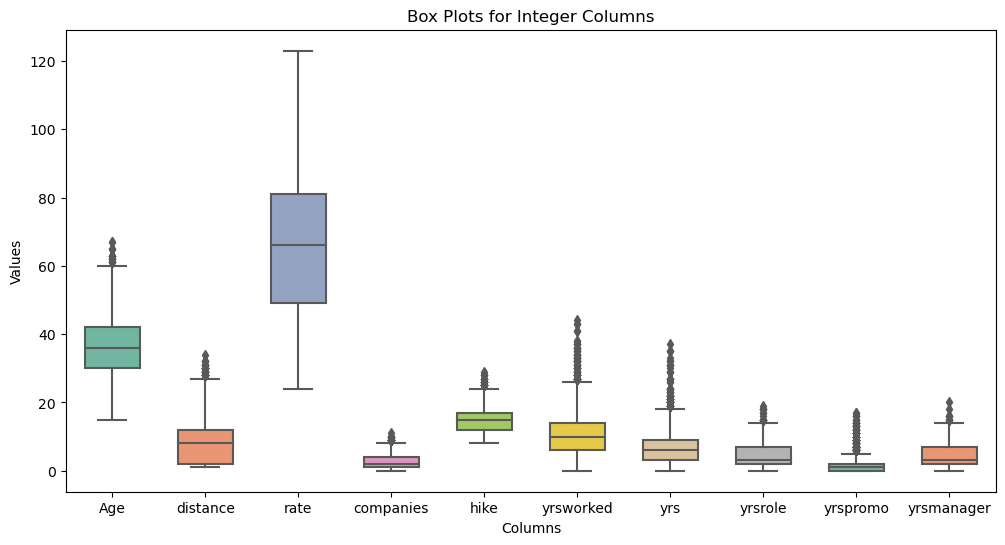

In [39]:
columns_to_plot = ['Age', 'distance', 'rate', 'companies', 'hike', 'yrsworked', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[columns_to_plot], width=0.6, palette="Set2")

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plots for Integer Columns")

plt.show()


There are outliers noted in the dataset, however i feel the data points are valid for this study, for example the Age attribute has outliers which are approximately 70years of which depending with the nature of the job some people can work upto that age.

## Sample Questions to answer in this analysis

- do employees tend to leave work work as they get older
- does distance travelled to work affect whether the employee keeps their job or not
- does the education field also affect if an employee stays
- do higher earners tend to keep their jobs
- what roles do the higher earners have in the company
- those who have changed companies before do they tend to keep their trend
- if one is married does it mean their more stable with jobs
- do the managers have an influence on employees staying on their jobs
- if there is gender imbalance in the company

<Axes: xlabel='Attrition', ylabel='Age'>

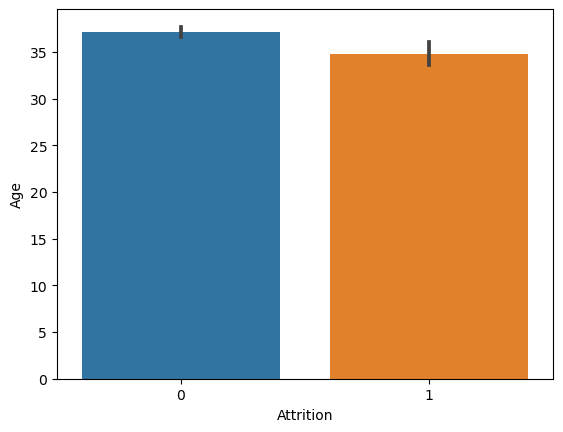

In [40]:
sns.barplot(x="Attrition", y="Age", data=df)

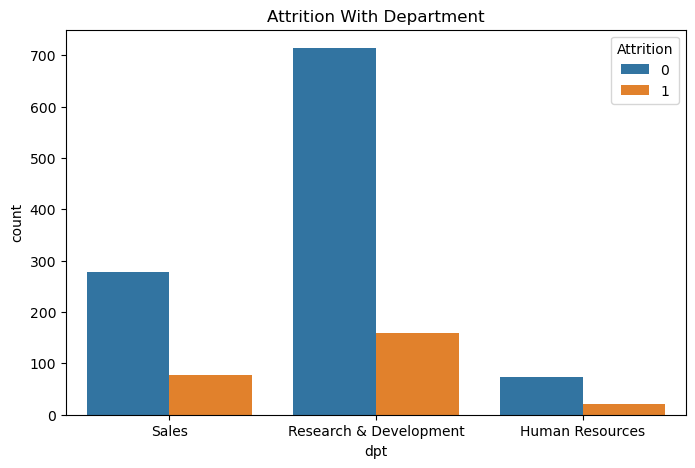

In [41]:
plt.figure(figsize=(8,5))

sns.countplot(x='dpt',hue='Attrition', data=df)

plt.title("Attrition With Department")

plt.show()

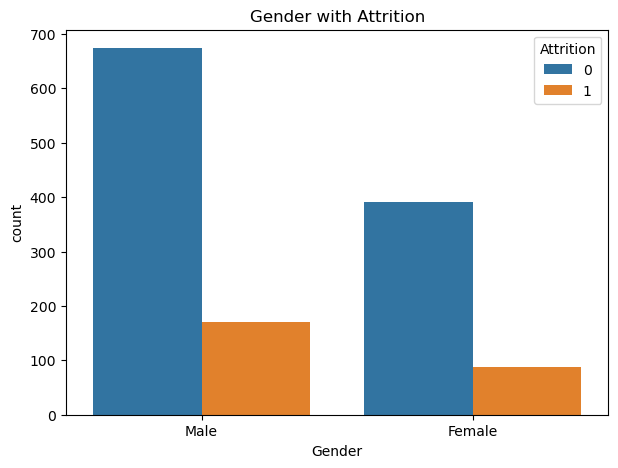

In [42]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='Attrition', data=df)

plt.title("Gender with Attrition")

plt.show()

In [43]:
df['Gender'].value_counts()

Male      845
Female    478
Name: Gender, dtype: int64

In [44]:
df['count'] = 1

In [45]:
df.groupby(['Gender', 'Attrition']).agg({"count":"sum"})

count
Gender Attrition       
Female 0            391
       1             87
Male   0            674
       1            171

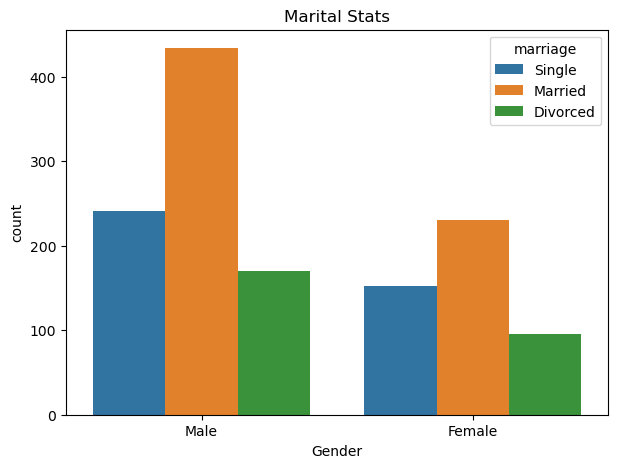

In [46]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='marriage', data=df)

plt.title("Marital Stats")

plt.show()

In [47]:
df.groupby(['marriage', 'Attrition']).agg({"count":"sum"})

count
marriage Attrition       
Divorced 0            224
         1             41
Married  0            555
         1            110
Single   0            286
         1            107

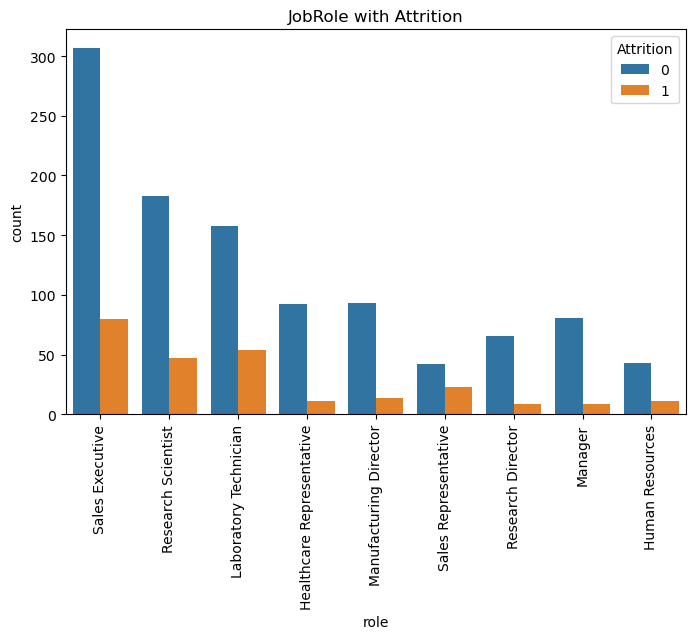

In [48]:
plt.figure(figsize=(8,5))

sns.countplot(x='role',hue='Attrition', data=df)

plt.title("JobRole with Attrition")

plt.xticks(rotation=90)

plt.show()

Text(0.5, 0.98, 'hourly rate based on daily rate and department')

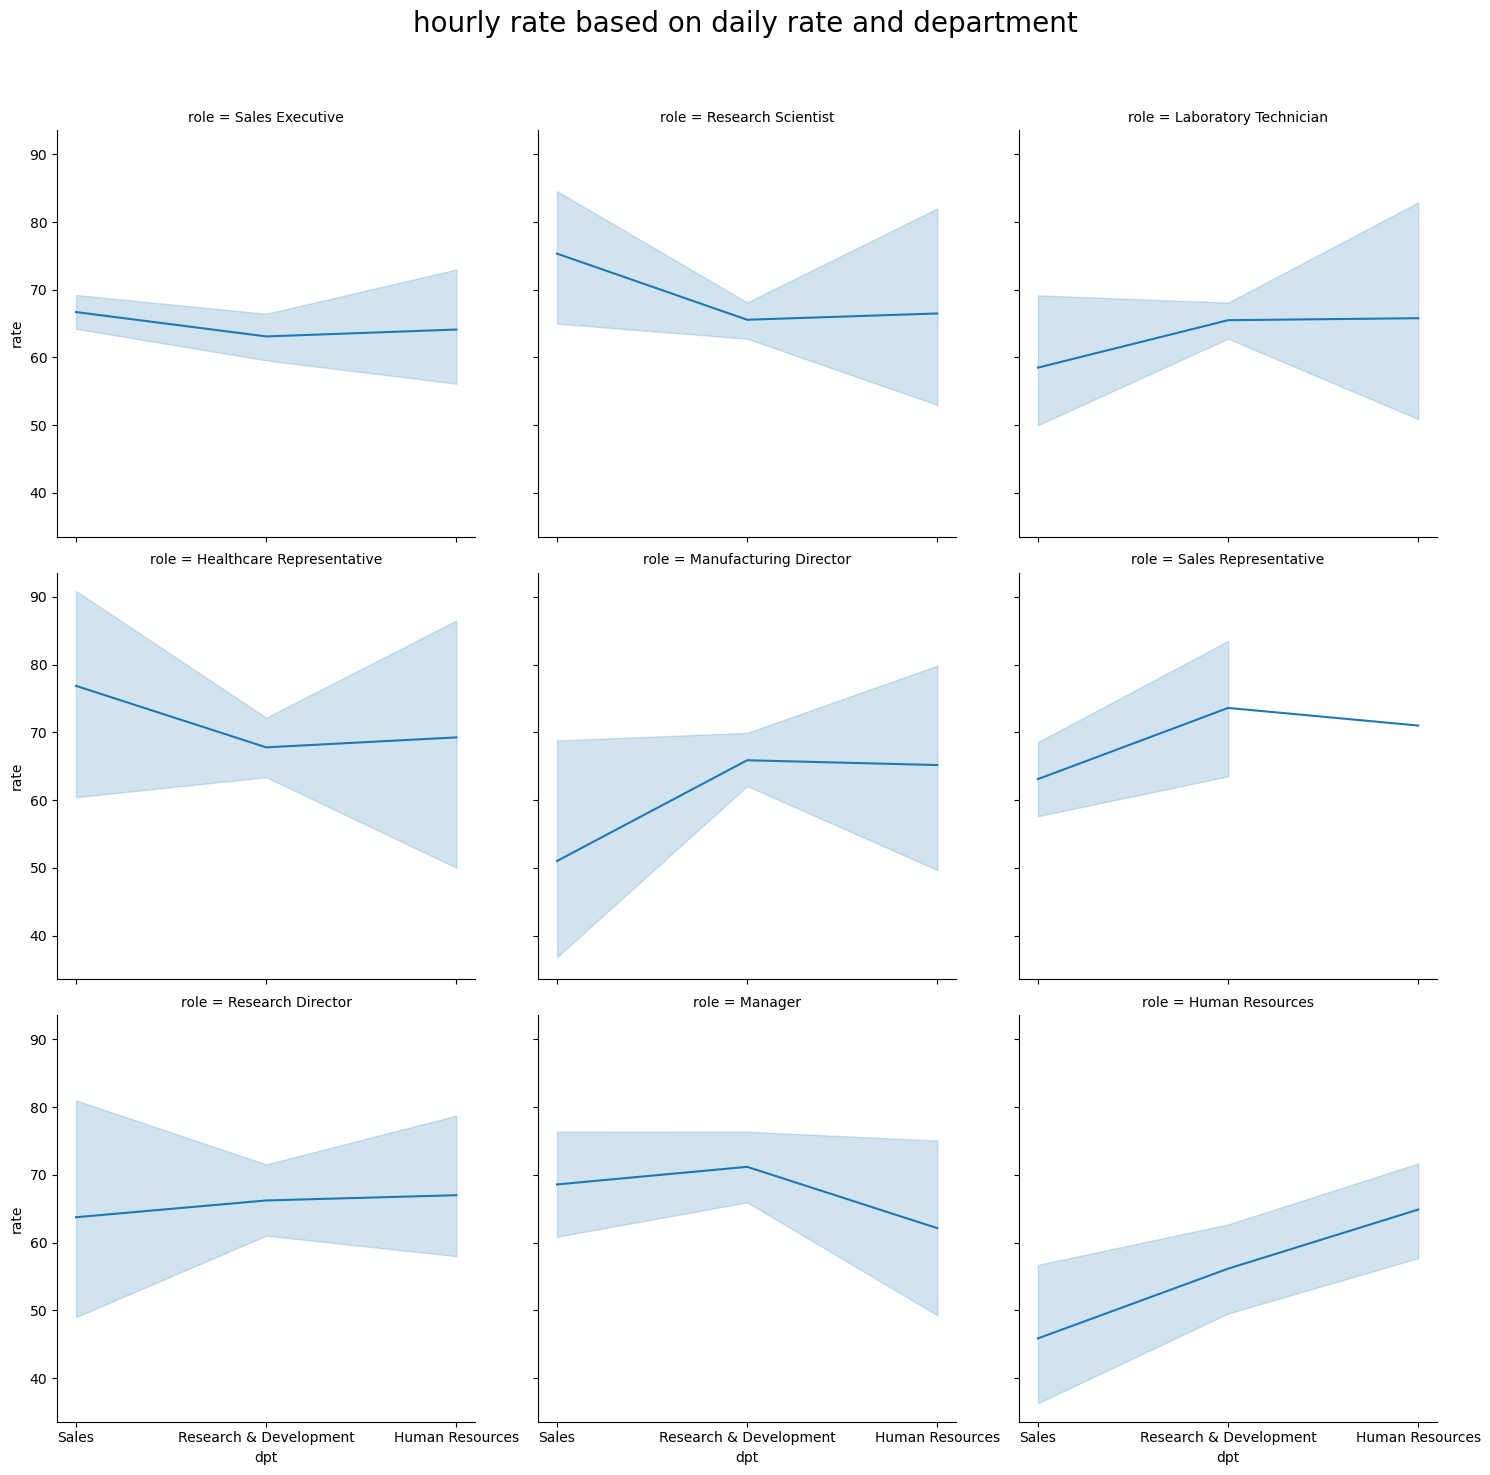

In [49]:
ax = sns.relplot(col="role", y="rate", kind="line",x='dpt', data=df, col_wrap=3)

ax.fig.subplots_adjust(top=0.9)

ax.fig.suptitle('hourly rate based on daily rate and department',fontsize=20)

## ANOVA 

for hypothesis testing and also to identify which columns will not be helpful in the machine learning model build up

In [50]:
num_cols = list(df.select_dtypes('int32').columns)
unrelated_num_cols = []
categorical_col = 'Attrition'


In [51]:
from scipy.stats import f_oneway
from scipy import stats

In [52]:
for i in num_cols:
   
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    alpha = 0.05

    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: 13.26
p-value: 0.0002822076363545242
Reject the null hypothesis: There is a significant relationship between Age and Attrition

ANOVA statistic: inf
p-value: 0.0
Reject the null hypothesis: There is a significant relationship between Attrition and Attrition

ANOVA statistic: 3.67
p-value: 0.05562067771042639
No significant relationship between distance and Attrition

ANOVA statistic: 1.22
p-value: 0.2701610549167558
No significant relationship between rate and Attrition

ANOVA statistic: 1.64
p-value: 0.20039757027584867
No significant relationship between companies and Attrition

ANOVA statistic: 0.53
p-value: 0.4678175652518751
No significant relationship between hike and Attrition

ANOVA statistic: 12.64
p-value: 0.00039125478554610403
Reject the null hypothesis: There is a significant relationship between stocks and Attrition

ANOVA statistic: 26.2
p-value: 3.538979957099741e-07
Reject the null hypothesis: There is a significant relationship between yrsworked and A

In [53]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['distance', 'rate', 'companies', 'hike', 'training', 'yrspromo']. These columns don't help in making predictions.


so i will also drop these columns that failed at the Anova test from the dataset since they won't add any value in predictions

In [54]:
df.drop(columns = unrelated_num_cols, inplace=True)
df.shape

(1323, 16)

## Encoding.

the process of encoding is done to convert categorical data into integers that cane be using bu the machine learning algorithms. the method i selected for the encoding is the Label Encoding because of the nature of my dataset.

In [55]:
df_original = df.copy()

In [56]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Object columns:", object_columns)


Object columns: ['travel', 'dpt', 'field', 'Gender', 'role', 'marriage', 'Over18', 'OverTime']


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df[object_columns] = df[object_columns].apply(label_encoder.fit_transform)

In [58]:
for column in object_columns:
    unique_encoded_values = df[column].unique()   
    print(f"Unique encoded values for column '{column}' {df_original[column].unique()} : {unique_encoded_values}")

Unique encoded values for column 'travel' ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] : [2 1 0]
Unique encoded values for column 'dpt' ['Sales' 'Research & Development' 'Human Resources'] : [2 1 0]
Unique encoded values for column 'field' ['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'
 'Human Resources'] : [1 4 3 5 2 0]
Unique encoded values for column 'Gender' ['Male' 'Female'] : [1 0]
Unique encoded values for column 'role' ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Healthcare Representative' 'Manufacturing Director'
 'Sales Representative' 'Research Director' 'Manager' 'Human Resources'] : [7 6 2 0 4 8 5 3 1]
Unique encoded values for column 'marriage' ['Single' 'Married' 'Divorced'] : [2 1 0]
Unique encoded values for column 'Over18' ['Y'] : [0]
Unique encoded values for column 'OverTime' ['Yes' 'No'] : [1 0]


In [59]:
df.head()

,Age,Attrition,travel,dpt,field,count,Gender,role,marriage,Over18,OverTime,stocks,yrsworked,yrs,yrsrole,yrsmanager
0,42,1,2,2,1,1,1,7,2,0,1,0,8,6,4,5
1,52,0,1,1,1,1,1,6,1,0,0,1,9,10,8,6
2,33,1,2,1,4,1,1,2,2,0,1,0,8,0,0,0
3,35,0,1,2,1,1,0,6,1,0,1,0,8,8,6,0
4,25,0,2,1,3,1,1,2,1,0,0,1,6,2,2,2


a big disadvantage of this encoding method is that it assigns a unique number from 0 to each class of data, hence a label with a high value maybe considered of more priority than one with a lower value. as an example for the Attribute, 'Role' a 'sales representative'is now represented by value '8' while a 'Healthcare representative' is now 0. this might look like the sales representative is mor important than the healthcare representative.

- hence we have to try the one_hot encoding method which assigns a binary number to indicate presence of any variable. i think this will be perfect my dataset since the dataset is  not inorder(nominal)

In [60]:
df_original.head()

,Age,Attrition,travel,dpt,field,count,Gender,role,marriage,Over18,OverTime,stocks,yrsworked,yrs,yrsrole,yrsmanager
0,42,1,Travel_Rarely,Sales,Life Sciences,1,Male,Sales Executive,Single,Y,Yes,0,8,6,4,5
1,52,0,Travel_Frequently,Research & Development,Life Sciences,1,Male,Research Scientist,Married,Y,No,1,9,10,8,6
2,33,1,Travel_Rarely,Research & Development,Other,1,Male,Laboratory Technician,Single,Y,Yes,0,8,0,0,0
3,35,0,Travel_Frequently,Sales,Life Sciences,1,Female,Research Scientist,Married,Y,Yes,0,8,8,6,0
4,25,0,Travel_Rarely,Research & Development,Medical,1,Male,Laboratory Technician,Married,Y,No,1,6,2,2,2


In [61]:
y = df_original['Attrition']
X = df_original.drop(columns = ['Attrition', 'count'])

for the column 'Gender' we can manually encode male to be 0 and female to be 1 and also overtime, for no to be 0 and yes 1

In [62]:
X['Gender'] = np.where(X['Gender'] == 'Male', 0, 1)

X['OverTime'] = np.where(X['OverTime'] == 'No', 0, 1)

In [63]:
df_cat_cols = X.select_dtypes(include='object')

In [64]:
df_cat_cols.head()

,travel,dpt,field,role,marriage,Over18
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y
3,Travel_Frequently,Sales,Life Sciences,Research Scientist,Married,Y
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y


In [65]:
df_cat_encoded = pd.get_dummies(df_cat_cols)

In [66]:
df_cat_encoded.head()

,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single,Over18_Y
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [67]:
df_num_cols = X.select_dtypes(include=np.number)

In [68]:
df_num_cols.head()

,Age,Gender,OverTime,stocks,yrsworked,yrs,yrsrole,yrsmanager
0,42,0,1,0,8,6,4,5
1,52,0,0,1,9,10,8,6
2,33,0,1,0,8,0,0,0
3,35,1,1,0,8,8,6,0
4,25,0,0,1,6,2,2,2


In [69]:
X_true = pd.concat([df_num_cols, df_cat_encoded], axis=1)

In [70]:
X_true.head()

,Age,Gender,OverTime,stocks,yrsworked,yrs,yrsrole,yrsmanager,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single,Over18_Y
0,42,0,1,0,8,6,4,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,52,0,0,1,9,10,8,6,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,33,0,1,0,8,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,35,1,1,0,8,8,6,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,25,0,0,1,6,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [71]:
X_true.shape

(1323, 33)

## Scaling

looking at the dataset now, there are features with larger values, these can be dorminating over other features with smaller values, so we have to scale them to ensure all features contributes equally to the machine learning models.

- earlier on i had seen some outliers in the dataset but chose to ignore them. but this may bring a distortion in the Machine learning algorithm hence i will use the Robust Scalling method which uses the median and the IQR to handle outliers.
- scaling also helps data with high dimensionallity on the Principal Component Analysis

In [72]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [73]:
columns_to_scale = X_true.columns

In [74]:
X_true_scaled = X_true.copy()
X_true_scaled[columns_to_scale] = scaler.fit_transform(X_true[columns_to_scale])

In [75]:
X_true_scaled.head()

,Age,Gender,OverTime,stocks,yrsworked,yrs,yrsrole,yrsmanager,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single,Over18_Y
0,0.500000,0.0,1.0,-1.0,-0.250,0.000000,0.2,0.4,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
1,1.333333,0.0,0.0,0.0,-0.125,0.666667,1.0,0.6,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.250000,0.0,1.0,-1.0,-0.250,-1.000000,-0.6,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
3,-0.083333,1.0,1.0,-1.0,-0.250,0.333333,0.6,-0.6,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.916667,0.0,0.0,0.0,-0.500,-0.666667,-0.2,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Principal Component Analysis (PCA)

the dataset we have here has a lot of variables and also considering the encoding method employed those variables sort of increased to 33 columns and we need to employ dimenstionality reduction technique to help simplify the data while retaining its essential information. 

PCA works by tranforming correlated variables into smaller number of uncorrelated variables effectivley summarising the key patterns in the dataset.

- this reduction of number of variables also help with simplifying data visuals and analysis, easily identifying patterns and relationships within the data

- eliminating highly correlated features helps reduces the risk of data overfitting in machine learning model. Overfitting in machine learning is when a model fita the training data too closely and fail to capture the true relationships between variables, in the end poorly performing on new data

In [77]:
from sklearn.decomposition import PCA

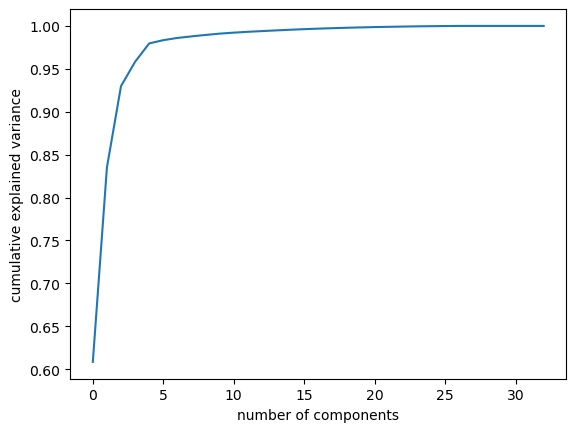

In [78]:
pca = PCA().fit(X_true) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

from the graph above to get a variance of 95% to 99% variance we need about 4 principal components

In [81]:
pca = PCA(4)
projected = pca.fit_transform(X_true)

In [82]:
projected.shape

(1323, 4)

In [83]:
attrition_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4'])

In [84]:
attrition_pca.head()

,C1,C2,C3,C4
0,1.756363,4.652435,-3.900177,-0.832296
1,11.497563,6.441688,-9.517377,-1.596106
2,-7.770795,5.548613,4.058187,0.724117
3,-3.223743,0.204037,-1.949124,1.671071
4,-13.710452,-0.998829,3.139248,-0.254363


In [85]:
attrition_pca['Attrition'] = df['Attrition']

In [86]:
attrition_pca.head()

,C1,C2,C3,C4,Attrition
0,1.756363,4.652435,-3.900177,-0.832296,1.0
1,11.497563,6.441688,-9.517377,-1.596106,0.0
2,-7.770795,5.548613,4.058187,0.724117,1.0
3,-3.223743,0.204037,-1.949124,1.671071,0.0
4,-13.710452,-0.998829,3.139248,-0.254363,0.0


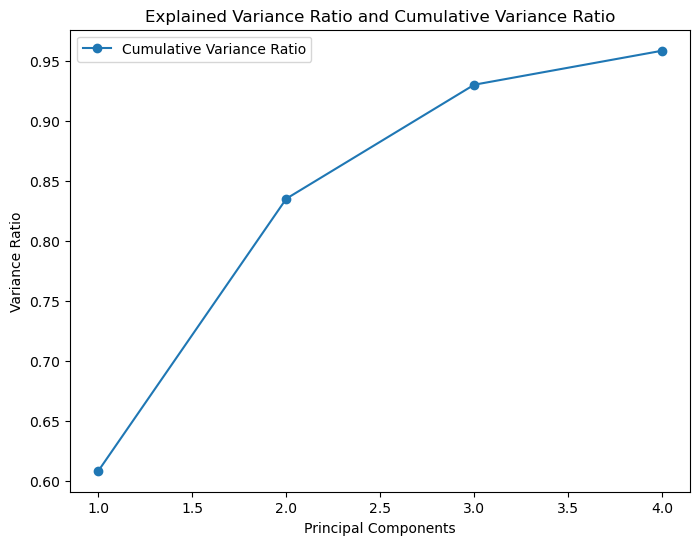

In [91]:
num_components = 4

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), cumulative_variance_ratio, label='Cumulative Variance Ratio', marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Variance Ratio')
plt.legend()
plt.show()